In [1]:
import pandas as pd
import numpy as np
import os
from scipy import stats
import math
# acquire
from env import host, user, password
from pydataset import data

# visualize
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(11, 9))
plt.rc('font', size=13)

# turn off pink warning boxes
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import explained_variance_score

import acquire

# Acquire

In [2]:
#acquire for zillow
zillow_df= acquire.get_zillow_data()

In [3]:
#Looking at first 5 values
zillow_df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,parcelid
0,3.0,2.0,1316.0,205123.0,1923.0,2627.48,6037.0,11721753
1,3.0,2.0,1458.0,136104.0,1970.0,2319.90,6037.0,11289917
2,2.0,1.0,1421.0,35606.0,1911.0,543.69,6037.0,11705026
3,4.0,3.0,2541.0,880456.0,2003.0,9819.72,6059.0,14269464
4,3.0,2.0,1491.0,107110.0,1955.0,1399.27,6037.0,11446756


In [4]:
#28,000 rows and 8 columns
zillow_df.shape

(28418, 8)

In [5]:
# Displaying readable summary statistics for numeric columns.
zillow_df.describe().T

,count,mean,std,min,25%,50%,75%,max
bedroomcnt,28418.0,3.298086e+00,9.547586e-01,0.00,3.00,3.0,4.00,1.200000e+01
bathroomcnt,28418.0,2.311070e+00,1.017817e+00,0.00,2.00,2.0,3.00,1.100000e+01
calculatedfinishedsquarefeet,28345.0,1.931781e+03,1.013657e+03,240.00,1276.00,1669.0,2319.00,3.564000e+04
taxvaluedollarcnt,28417.0,5.332912e+05,7.063144e+05,1000.00,198412.00,380733.0,630000.00,2.385837e+07
yearbuilt,28322.0,1.963908e+03,2.307474e+01,1878.00,1950.00,1961.0,1980.00,2.016000e+03
taxamount,28417.0,6.486383e+03,8.209046e+03,51.26,2690.92,4703.7,7495.44,2.767978e+05
fips,28418.0,6.050004e+03,2.191571e+01,6037.00,6037.00,6037.0,6059.00,6.111000e+03
parcelid,28418.0,1.307361e+07,3.747577e+06,10711855.00,11523237.25,12611531.0,14163710.25,1.676878e+08


In [6]:
# Running .info() shows us that the exam3 column is not a numeric data type; it's an object.

zillow_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28418 entries, 0 to 28417
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bedroomcnt                    28418 non-null  float64
 1   bathroomcnt                   28418 non-null  float64
 2   calculatedfinishedsquarefeet  28345 non-null  float64
 3   taxvaluedollarcnt             28417 non-null  float64
 4   yearbuilt                     28322 non-null  float64
 5   taxamount                     28417 non-null  float64
 6   fips                          28418 non-null  float64
 7   parcelid                      28418 non-null  int64  
dtypes: float64(7), int64(1)
memory usage: 1.7 MB


In [7]:
#Looking at how many nulls in each column
zillow_df.isnull().sum()

bedroomcnt                       0
bathroomcnt                      0
calculatedfinishedsquarefeet    73
taxvaluedollarcnt                1
yearbuilt                       96
taxamount                        1
fips                             0
parcelid                         0
dtype: int64

In [8]:
# Count duplicate on a bedroom count column
zillow_df.bedroomcnt.duplicated().sum()

28405

In [9]:
# Count duplicate on a bathroom count column
zillow_df.bathroomcnt.duplicated().sum()

28398

In [10]:
# Count duplicate on a calculatedfinishedsquarefeet column
zillow_df.calculatedfinishedsquarefeet.duplicated().sum()

24360

In [11]:
# Count duplicate on a taxvaluedollarcnt column
zillow_df.taxvaluedollarcnt.duplicated().sum()

5484

In [12]:
#created a for loop that goes through each column and counts the duplicates
for cols in zillow_df: 
    count= zillow_df[cols].duplicated().sum()
    print(f''' 
    {cols} count: {count}''')
    

 
    bedroomcnt count: 28405
 
    bathroomcnt count: 28398
 
    calculatedfinishedsquarefeet count: 24360
 
    taxvaluedollarcnt count: 5484
 
    yearbuilt count: 28286
 
    taxamount count: 479
 
    fips count: 28415
 
    parcelid count: 26


In [13]:
#33 rows have duplicates as shown here with a mask
zillow_df[zillow_df.duplicated()== True]

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,parcelid
325,2.0,1.0,1082.0,314100.0,1921.0,3731.14,6037.0,12102046
417,3.0,2.0,1780.0,347615.0,1977.0,4538.95,6037.0,12847318
526,4.0,2.5,2217.0,98707.0,1972.0,1343.64,6059.0,14050918
881,2.0,1.0,1166.0,324880.0,1911.0,4042.46,6037.0,11717962
1069,4.0,3.5,3453.0,939019.0,2006.0,14702.96,6059.0,14455319
1446,2.0,1.0,1025.0,48107.0,1940.0,862.90,6059.0,14074415
1670,4.0,3.0,2717.0,733000.0,1998.0,8314.78,6111.0,17225336
1964,4.0,4.0,2459.0,479000.0,2007.0,12285.88,6111.0,162960529
3220,2.0,1.0,1228.0,486805.0,1918.0,5892.10,6037.0,12537644
3825,3.0,3.5,4373.0,5279300.0,1988.0,55756.66,6059.0,13893511


In [14]:
# looking at duplicates by unique values
zillow_df.duplicated().value_counts()

False    28392
True        26
dtype: int64

In [15]:
#drop the nulls
zillow_df= zillow_df.dropna()

In [16]:
#verify nulls were dropped
zillow_df.isnull().sum()

bedroomcnt                      0
bathroomcnt                     0
calculatedfinishedsquarefeet    0
taxvaluedollarcnt               0
yearbuilt                       0
taxamount                       0
fips                            0
parcelid                        0
dtype: int64

## Acquire Takeways:
- need to drop nulls from calculatedfinishedsquarefeet, unitcnt, taxvaluedollarcnt, yearbuilt, taxamount 
- need to drop duplicates by parcelid (this is a unique identifier)
- all datatypes look good, no changes needed

# Prepare

In [17]:
# Count duplicate on a parcelid column
zillow_df['parcelid'].duplicated().sum()

24

In [18]:
#drop duplicated by unique identifier parcelid column
zillow_df.drop_duplicates(subset=['parcelid'], inplace= True)

In [19]:
#Looking at shape after dropping columns
zillow_df.shape

(28292, 8)

In [20]:
# Drop all rows with any Null values, assign to df, and verify.
zillow_df = zillow_df.dropna()


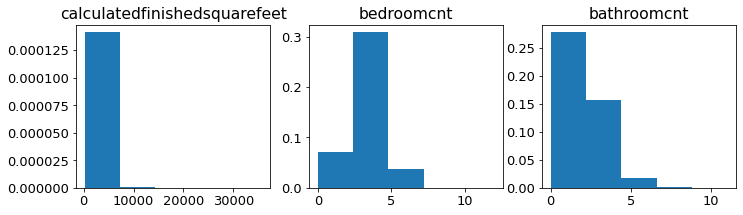

In [21]:
#Looking to see outliers were removed, can see all columns are closer to a normal distribution

# Plot the distributions
plt.figure(figsize=(16, 3))

# List of columns
cols = ['calculatedfinishedsquarefeet', 'bedroomcnt', 'bathroomcnt']

for i, col in enumerate(cols):

    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 

    # Create subplot.
    plt.subplot(1,4, plot_number)

    # Title with column name.
    plt.title(col)

    # Display histogram for column.
    zillow_df[col].hist(bins=5, density= True)

    # Hide gridlines.
    plt.grid(False)

## Drop outliers

In [22]:
#Function to see outliers
def outlier_bound_calculation(df, variable):
    '''
    calcualtes the lower and upper bound to locate outliers in variables
    '''
    quartile1, quartile3 = np.percentile(df[variable], [25,75])
    IQR_value = quartile3 - quartile1
    lower_bound = quartile1 - (1.5 * IQR_value)
    upper_bound = quartile3 + (1.5 * IQR_value)
    '''
    returns the lowerbound and upperbound values
    '''
    return print(f'For {variable} the lower bound is {lower_bound} and  upper bound is {upper_bound}')

In [23]:
outlier_bound_calculation(zillow_df, 'calculatedfinishedsquarefeet')

For calculatedfinishedsquarefeet the lower bound is -284.5 and  upper bound is 3879.5


In [24]:
#remove outliers from calculatedfinishedsquarefeet
zillow_df= zillow_df[zillow_df.calculatedfinishedsquarefeet > -189.5]
zillow_df= zillow_df[zillow_df.calculatedfinishedsquarefeet < 3550.5]

In [25]:
#making sure it did what it is suppose to
zillow_df.describe().T

,count,mean,std,min,25%,50%,75%,max
bedroomcnt,26566.0,3.222728e+00,8.711257e-01,0.00,3.00,3.000000e+00,4.00,9.000000e+00
bathroomcnt,26566.0,2.165682e+00,7.925163e-01,0.00,2.00,2.000000e+00,3.00,7.500000e+00
calculatedfinishedsquarefeet,26566.0,1.753553e+03,6.529273e+02,240.00,1254.00,1.615000e+03,2154.00,3.550000e+03
taxvaluedollarcnt,26566.0,4.448616e+05,4.340590e+05,1000.00,187224.50,3.577225e+05,569654.75,1.561849e+07
yearbuilt,26566.0,1.962493e+03,2.224980e+01,1878.00,1950.00,1.960000e+03,1977.00,2.016000e+03
taxamount,26566.0,5.459551e+03,4.995789e+03,51.26,2571.66,4.460355e+03,6830.16,1.777409e+05
fips,26566.0,6.049784e+03,2.181837e+01,6037.00,6037.00,6.037000e+03,6059.00,6.111000e+03
parcelid,26566.0,1.302740e+07,3.069465e+06,10711855.00,11505590.25,1.259623e+07,14141683.75,1.676380e+08


In [26]:
outlier_bound_calculation(zillow_df, 'bedroomcnt')

For bedroomcnt the lower bound is 1.5 and  upper bound is 5.5


In [27]:
#remove outliers from bedroomcnt
zillow_df= zillow_df[zillow_df.bedroomcnt >1.5]
zillow_df= zillow_df[zillow_df.bedroomcnt < 5.5]

In [28]:
outlier_bound_calculation(zillow_df, 'bathroomcnt')

For bathroomcnt the lower bound is 0.5 and  upper bound is 4.5


In [29]:
#remove outliers from bedroomcnt
zillow_df= zillow_df[zillow_df.bathroomcnt > 0.5]
zillow_df= zillow_df[zillow_df.bathroomcnt < 4.5]

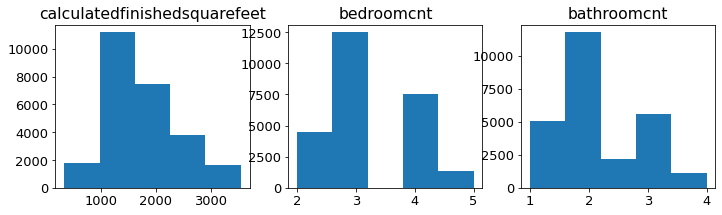

In [31]:
# Visualize to make sure outliers were removed, all graphs are closer to normal distribution
# Plot the distributions
plt.figure(figsize=(16, 3))

# List of columns
cols = ['calculatedfinishedsquarefeet', 'bedroomcnt', 'bathroomcnt']

for i, col in enumerate(cols):

    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 

    # Create subplot.
    plt.subplot(1,4, plot_number)

    # Title with column name.
    plt.title(col)

    # Display histogram for column.
    zillow_df[col].hist(bins=5)

    # Hide gridlines.
    plt.grid(False)

In [32]:
zillow_df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,parcelid
0,3.0,2.0,1316.0,205123.0,1923.0,2627.48,6037.0,11721753
1,3.0,2.0,1458.0,136104.0,1970.0,2319.90,6037.0,11289917
2,2.0,1.0,1421.0,35606.0,1911.0,543.69,6037.0,11705026
3,4.0,3.0,2541.0,880456.0,2003.0,9819.72,6059.0,14269464
4,3.0,2.0,1491.0,107110.0,1955.0,1399.27,6037.0,11446756


# Explore

In [33]:
from sklearn.model_selection import train_test_split
def split_zillow(df, target):
    '''
    this function takes in the zillow dataframe
    splits into train, validate and test subsets
    then splits for X (features) and y (target)
    '''
    # split df into 20% test, 80% train_validate
    train_validate, test = train_test_split(df, test_size=0.2, random_state=1234)
    # split train_validate into 30% validate, 70% train
    train, validate = train_test_split(train_validate, test_size=0.3, random_state=1234)
    # Split with X and y
    X_train = train.drop(columns=[target])
    y_train = train[target]
    X_validate = validate.drop(columns=[target])
    y_validate = validate[target]
    X_test = test.drop(columns=[target])
    y_test = test[target]
    return train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test

In [34]:
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test= split_zillow(zillow_df, 'taxvaluedollarcnt')

In [35]:
y_train.head()

17622     326735.0
26216    1357426.0
6909      568000.0
4048       93854.0
24719      61457.0
Name: taxvaluedollarcnt, dtype: float64

In [36]:
y_validate.head()

20450     728000.0
18935    6700650.0
23732      49863.0
19000    1560000.0
17146     336547.0
Name: taxvaluedollarcnt, dtype: float64

In [37]:
y_validate.isnull().sum()

0

In [38]:
#Creating numeric columns
numeric_cols= ['calculatedfinishedsquarefeet']

In [39]:
#min_max_scale function
# def min_max_scale(X_train, X_validate, X_test, numeric_cols):
#     """
#     this function takes in 3 dataframes with the same columns,
#     a list of numeric column names (because the scaler can only work with numeric columns),
#     and fits a min-max scaler to the first dataframe and transforms all
#     3 dataframes using that scaler.
#     it returns 3 dataframes with the same column names and scaled values.
#     """
#     # create the scaler object and fit it to X_train (i.e. identify min and max)
#     # if copy = false, inplace row normalization happens and avoids a copy (if the input is already a numpy array).

#     scaler = MinMaxScaler(copy=True).fit(X_train[numeric_cols])

#     # scale X_train, X_validate, X_test using the mins and maxes stored in the scaler derived from X_train.
#     #
#     X_train_scaled_array = scaler.transform(X_train[numeric_cols])
#     X_validate_scaled_array = scaler.transform(X_validate[numeric_cols])
#     X_test_scaled_array = scaler.transform(X_test[numeric_cols])

#     # convert arrays to dataframes
#     X_train_scaled = pd.DataFrame(X_train_scaled_array, columns=numeric_cols).set_index(
#         [X_train.index.values]
#     )

#     X_validate_scaled = pd.DataFrame(
#         X_validate_scaled_array, columns=numeric_cols
#     ).set_index([X_validate.index.values])

#     X_test_scaled = pd.DataFrame(X_test_scaled_array, columns=numeric_cols).set_index(
#         [X_test.index.values]
#     )
#     # Overwriting columns in our input dataframes for simplicity
#     for i in numeric_cols:
#         X_train[i] = X_train_scaled[i]
#         X_validate[i] = X_validate_scaled[i]
#         X_test[i] = X_test_scaled[i]

#     return X_train_scaled, X_validate_scaled, X_test_scaled

In [40]:
def min_max_scaler(X_train, X_validate, X_test, numeric_cols):
    """
    this function takes in 3 dataframes with the same columns,
    a list of numeric column names (because the scaler can only work with numeric columns),
    and fits a min-max scaler to the first dataframe and transforms all
    3 dataframes using that scaler.
    it returns 3 dataframes with the same column names and scaled values.
    """
    # create the scaler object and fit it to X_train (i.e. identify min and max)
    # if copy = false, inplace row normalization happens and avoids a copy (if the input is already a numpy array).
    scaler = MinMaxScaler(copy=True).fit(X_train[numeric_cols])
    # scale X_train, X_validate, X_test using the mins and maxes stored in the scaler derived from X_train.
    #
    X_train_scaled_array = scaler.transform(X_train[numeric_cols])
    X_validate_scaled_array = scaler.transform(X_validate[numeric_cols])
    X_test_scaled_array = scaler.transform(X_test[numeric_cols])
    # convert arrays to dataframes
    X_train_scaled = pd.DataFrame(X_train_scaled_array, columns=numeric_cols).set_index(
        [X_train.index.values]
    )
    X_validate_scaled = pd.DataFrame(
        X_validate_scaled_array, columns=numeric_cols
    ).set_index([X_validate.index.values])
    X_test_scaled = pd.DataFrame(X_test_scaled_array, columns=numeric_cols).set_index(
        [X_test.index.values]
    )
    # Overwriting columns in our input dataframes for simplicity
    for i in numeric_cols:
        X_train[i] = X_train_scaled[i]
        X_validate[i] = X_validate_scaled[i]
        X_test[i] = X_test_scaled[i]
    return X_train, X_validate, X_test

In [41]:
#using function
X_train_scaled, X_validate_scaled, X_test_scaled= min_max_scaler(X_train, X_validate, X_test, numeric_cols)

In [42]:
#looking at shape for each scaled dataset
X_train_scaled.shape, X_validate_scaled.shape, X_test_scaled.shape

((14455, 7), (6195, 7), (5163, 7))

In [43]:
X_train_scaled.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,yearbuilt,taxamount,fips,parcelid
17622,3.0,2.0,0.378858,1950.0,3961.45,6037.0,12482091
26216,5.0,3.0,0.709783,1951.0,14836.32,6059.0,13889789
6909,3.0,3.0,0.561392,1988.0,8191.31,6037.0,11344899
4048,5.0,3.0,0.561064,1971.0,1389.40,6111.0,17246190
24719,2.0,1.0,0.099803,1925.0,1287.57,6037.0,12359021


In [44]:
#dropping target from scaled data
X_train_scaled= X_train_scaled.drop(columns=['taxamount'])
X_validate_scaled= X_validate_scaled.drop(columns=['taxamount'])
X_test_scaled= X_test_scaled.drop(columns=['taxamount'])

In [45]:
#Verify taxamount column was dropped
X_train_scaled.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,yearbuilt,fips,parcelid
17622,3.0,2.0,0.378858,1950.0,6037.0,12482091
26216,5.0,3.0,0.709783,1951.0,6059.0,13889789
6909,3.0,3.0,0.561392,1988.0,6037.0,11344899
4048,5.0,3.0,0.561064,1971.0,6111.0,17246190
24719,2.0,1.0,0.099803,1925.0,6037.0,12359021


In [46]:
#Verify taxamount column was dropped
X_validate_scaled.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,yearbuilt,fips,parcelid
20450,4.0,3.0,0.620158,1969.0,6111.0,17283526
18935,3.0,2.0,0.369993,1949.0,6037.0,11686158
23732,3.0,1.0,0.171044,1951.0,6037.0,12397747
19000,3.0,2.0,0.478661,1969.0,6037.0,11691199
17146,2.0,1.0,0.122784,1953.0,6037.0,11440877


In [47]:
#Verify taxamount column was dropped
X_test_scaled.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,yearbuilt,fips,parcelid
3179,5.0,2.0,0.376559,1964.0,6059.0,14038888
27149,4.0,4.0,0.784636,1986.0,6059.0,14433304
2590,3.0,2.0,0.240972,1962.0,6037.0,12428011
258,2.0,1.0,0.108995,1980.0,6037.0,12504405
23978,2.0,1.5,0.152988,1973.0,6059.0,14073259


In [48]:
#Feature engineering

In [49]:
# parameters: f_regression stats test, give me 3 features
f_selector = SelectKBest(f_regression, k=2)

# find the top 2 X's correlated with y
f_selector.fit(X_train_scaled, y_train)

# boolean mask of whether the column was selected or not. 
feature_mask = f_selector.get_support()

# get list of top K features. 
f_feature = X_train_scaled.iloc[:,feature_mask].columns.tolist()

In [50]:
f_feature

['bathroomcnt', 'calculatedfinishedsquarefeet']

## Hypothesis 1:
- HO: Square feet has no relationship on tax value dollar count
- Ha: Square feet has a relationship on tax value dollar count

In [51]:
corr, p = stats.pearsonr(train.calculatedfinishedsquarefeet, train.taxvaluedollarcnt)

print(f'corr = {corr:.5f}')
print(f'p = {p:.1f}')

corr = 0.42643
p = 0.0


In [52]:
#set alpha
alpha= 0.05

In [53]:
#Is there a correlation?
# compare our p-value to our alpha:
p < alpha

True

## Hypothesis 2:
- HO: There is no difference between bedroom count and tax value dollar count
- Ha: There is a difference between bedroom count and tax value dollar count

In [54]:
# 2 sample 2 tailed t test
t, p = stats.ttest_ind(train.taxvaluedollarcnt, train.bedroomcnt, equal_var=False)

t, p

(131.56989010958694, 0.0)

In [55]:
#What can we conclude?
if p < alpha:
     print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


Note: This is not by chance because we reject the null hypothesis.

## Hypothesis 3:
- HO: There is no difference between bathroom count and tax value dollar count
- Ha: There is a difference between bathroom count and tax value dollar count

In [56]:
# 2 sample 2 tailed t test
t2, p2 = stats.ttest_ind(train.taxvaluedollarcnt, train.bathroomcnt, equal_var=False)

t2, p2

(131.57021568292265, 0.0)

In [57]:
#What is the conclusion?
if p2 < alpha:
     print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


Note: This is not by chance because we reject the null hypothesis.

# Modeling

In [58]:
y_train.head()

17622     326735.0
26216    1357426.0
6909      568000.0
4048       93854.0
24719      61457.0
Name: taxvaluedollarcnt, dtype: float64

In [59]:
y_train.shape

(14455,)

## Creating Baseline

In [60]:
# We need y_train and y_validate to be dataframes to append the new columns with predicted values.
#make it a dataframe
y_train= pd.DataFrame({'actual': y_train})
y_validate = pd.DataFrame({'actual': y_validate})
y_test = pd.DataFrame({'actual': y_test})

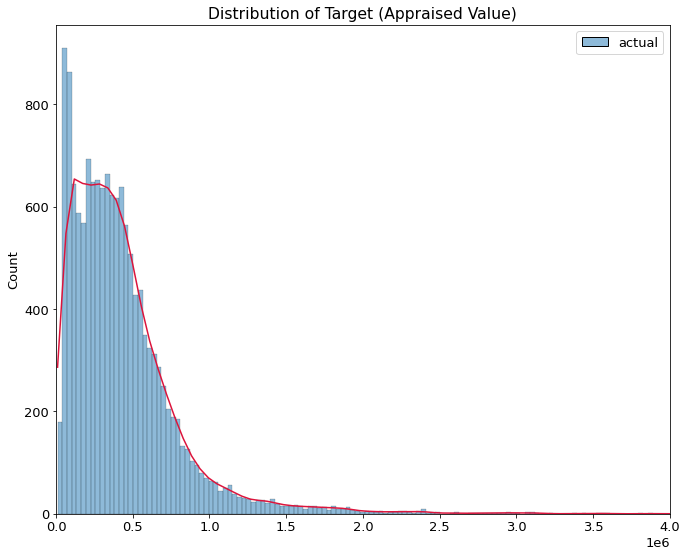

In [97]:
# Is it a normal distribution?
ax= sns.histplot(y_train, kde=True)
plt.xlim(0, 4000000)
ax.lines[0].set_color('crimson')
plt.title('Distribution of Target (Appraised Value)')
plt.show()

In [61]:
#verifying actual column was added

y_train.head()

,actual
17622,326735.0
26216,1357426.0
6909,568000.0
4048,93854.0
24719,61457.0


In [62]:
y_validate.head()

,actual
20450,728000.0
18935,6700650.0
23732,49863.0
19000,1560000.0
17146,336547.0


In [63]:
y_test.head()

,actual
3179,624378.0
27149,974034.0
2590,424244.0
258,295437.0
23978,366121.0


In [64]:
#Created baseline
baseline= y_train['actual'].mean()

In [65]:
#Making baseline column
y_train['baseline'] = baseline

In [66]:
#verifying baseline column was added
y_train.head()

,actual,baseline
17622,326735.0,436271.273331
26216,1357426.0,436271.273331
6909,568000.0,436271.273331
4048,93854.0,436271.273331
24719,61457.0,436271.273331


In [67]:
#calculate RMSE for baseline model
rmse_baseline= math.sqrt(mean_squared_error(y_train.actual, y_train.baseline))
r2_baseline = explained_variance_score(y_train.actual, y_train.baseline)

print('\nTrain RMSE baseline model:', rmse_baseline,
     '\nr^2_validate:', r2_baseline)


Train RMSE baseline model: 398649.2186206569 
r^2_validate: -2.220446049250313e-16


In [68]:
#creating baseline, actual, and prediction column for validate dataset
y_validate['baseline']= y_train.actual.mean()

## Linear Regression Model

In [69]:
#OLS regression model 1: Train dataset
#Created the object
model1= LinearRegression(normalize= True)
model1.fit(X_train_scaled[['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet']], y_train.actual)

LinearRegression(normalize=True)

In [70]:
X_train_scaled.isnull().sum() #checking nulls for X_train_scaled

bedroomcnt                      0
bathroomcnt                     0
calculatedfinishedsquarefeet    0
yearbuilt                       0
fips                            0
parcelid                        0
dtype: int64

In [71]:
y_train.isnull().sum() # checking nulls for y_train

actual      0
baseline    0
dtype: int64

In [72]:
#creating prediction column: used model to create predictions and then added it to the y_train
y_train['appraised_value_pred_lr'] = model1.predict(X_train_scaled[['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet']])

In [73]:
y_train.head()

,actual,baseline,appraised_value_pred_lr
17622,326735.0,436271.273331,425048.816763
26216,1357426.0,436271.273331,582728.744442
6909,568000.0,436271.273331,641491.724415
4048,93854.0,436271.273331,449770.133051
24719,61457.0,436271.273331,218028.932046


In [74]:
#calculate RMSE for model (train dataset)
rmse_train=math.sqrt(mean_squared_error(y_train.actual, y_train.appraised_value_pred_lr))
r2_lr = explained_variance_score(y_train.actual, y_train.appraised_value_pred_lr)

In [75]:
#creating prediction column for validate dataset
y_validate['appraised_value_pred_lr'] = model1.predict(X_validate_scaled[['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet']])

In [76]:
#calculate RMSE for validate model
rmse_validate= math.sqrt(mean_squared_error(y_validate.actual, y_validate.appraised_value_pred_lr))

In [77]:
# #creating baseline, actual, and prediction column for validate dataset
y_test['baseline']= y_train.actual.mean()
#creating prediction column for test dataset
y_test['appraised_value_pred_lr'] = model1.predict(X_test_scaled[['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet']])

In [78]:
# #calculate RMSE for test model
rmse_test= math.sqrt(mean_squared_error(y_test.actual, y_test.appraised_value_pred_lr))

In [79]:
print("RMSE for LinerRegression\nTrain/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate,
     "\nr2 for : ", rmse_validate,
     "RMSE for LinerRegression\nTest/In-Sample: ", rmse_test)

RMSE for LinerRegression
Train/In-Sample:  355371.99612718326 
Validation/Out-of-Sample:  394367.72376303555 
r2 for :  394367.72376303555 RMSE for LinerRegression
Test/In-Sample:  357127.2075284652


In [80]:
y_validate.head()

,actual,baseline,appraised_value_pred_lr
20450,728000.0,436271.273331,598315.411613
18935,6700650.0,436271.273331,417124.131316
23732,49863.0,436271.273331,186005.880243
19000,1560000.0,436271.273331,514274.904761
17146,336547.0,436271.273331,238574.412835


## LassoLars Model

In [81]:
# LassoLars Model

# create the model object
lars = LassoLars(alpha=1.0)
# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lars.fit(X_train_scaled[['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet']], y_train.actual)

LassoLars()

In [82]:
X_train_scaled.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,yearbuilt,fips,parcelid
17622,3.0,2.0,0.378858,1950.0,6037.0,12482091
26216,5.0,3.0,0.709783,1951.0,6059.0,13889789
6909,3.0,3.0,0.561392,1988.0,6037.0,11344899
4048,5.0,3.0,0.561064,1971.0,6111.0,17246190
24719,2.0,1.0,0.099803,1925.0,6037.0,12359021


In [83]:
y_train.head()

,actual,baseline,appraised_value_pred_lr
17622,326735.0,436271.273331,425048.816763
26216,1357426.0,436271.273331,582728.744442
6909,568000.0,436271.273331,641491.724415
4048,93854.0,436271.273331,449770.133051
24719,61457.0,436271.273331,218028.932046


In [84]:
# predict train
y_train['appraised_value_pred_lars'] = lars.predict(X_train_scaled[['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet']])

In [85]:
# evaluate: rmse
rmse_train2 = mean_squared_error(y_train.actual, y_train.appraised_value_pred_lars)**(1/2)

In [86]:
# predict validate
y_validate['appraised_value_pred_lars'] = lars.predict(X_validate_scaled[['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet']])
# evaluate: rmse
rmse_validate2 = mean_squared_error(y_validate.actual, y_validate.appraised_value_pred_lars)**(1/2)


In [87]:
#Looking to see what is in y_validate here
y_validate.head()

,actual,baseline,appraised_value_pred_lr,appraised_value_pred_lars
20450,728000.0,436271.273331,598315.411613,598254.750996
18935,6700650.0,436271.273331,417124.131316,417096.796817
23732,49863.0,436271.273331,186005.880243,186367.257036
19000,1560000.0,436271.273331,514274.904761,514144.840443
17146,336547.0,436271.273331,238574.412835,238577.611196


In [88]:
print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train2, 
      "\nValidation/Out-of-Sample: ", rmse_validate2)

RMSE for Lasso + Lars
Training/In-Sample:  355372.10845950997 
Validation/Out-of-Sample:  394369.84760229435


## TweedieRegressor Model

In [89]:
# create the model object
glm = TweedieRegressor(power=0, alpha=0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
glm.fit(X_train_scaled[['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet']], y_train.actual)


TweedieRegressor(alpha=0, power=0)

In [90]:
X_train_scaled.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,yearbuilt,fips,parcelid
17622,3.0,2.0,0.378858,1950.0,6037.0,12482091
26216,5.0,3.0,0.709783,1951.0,6059.0,13889789
6909,3.0,3.0,0.561392,1988.0,6037.0,11344899
4048,5.0,3.0,0.561064,1971.0,6111.0,17246190
24719,2.0,1.0,0.099803,1925.0,6037.0,12359021


In [91]:
# predict train
y_train['appraised_value_pred_glm'] = glm.predict(X_train_scaled[['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet']])

# evaluate: rmse
rmse_train3 = mean_squared_error(y_train.actual, y_train.appraised_value_pred_glm)**(1/2)

# predict validate
y_validate['appraised_value_pred_glm'] = glm.predict(X_validate_scaled[['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet']])

# evaluate: rmse
rmse_validate3 = mean_squared_error(y_validate.actual, y_validate.appraised_value_pred_glm)**(1/2)

print("RMSE for GLM using Tweedie, power=1 & alpha=0\nTraining/In-Sample: ", rmse_train3, 
      "\nValidation/Out-of-Sample: ", rmse_validate3)

RMSE for GLM using Tweedie, power=1 & alpha=0
Training/In-Sample:  355371.99612718326 
Validation/Out-of-Sample:  394367.72378248355


In [92]:
#Looking to see what is in y_validate
y_validate.head()

,actual,baseline,appraised_value_pred_lr,appraised_value_pred_lars,appraised_value_pred_glm
20450,728000.0,436271.273331,598315.411613,598254.750996,598315.411210
18935,6700650.0,436271.273331,417124.131316,417096.796817,417124.132091
23732,49863.0,436271.273331,186005.880243,186367.257036,186005.881084
19000,1560000.0,436271.273331,514274.904761,514144.840443,514274.906226
17146,336547.0,436271.273331,238574.412835,238577.611196,238574.414807


In [93]:
#All score together
print("RMSE for LinerRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train2, 
      "\nValidation/Out-of-Sample: ", rmse_validate2)

print("RMSE for GLM using Tweedie, power=1 & alpha=0\nTraining/In-Sample: ", rmse_train3, 
      "\nValidation/Out-of-Sample: ", rmse_validate3)


RMSE for LinerRegression
Training/In-Sample:  355371.99612718326 
Validation/Out-of-Sample:  394367.72376303555
RMSE for Lasso + Lars
Training/In-Sample:  355372.10845950997 
Validation/Out-of-Sample:  394369.84760229435
RMSE for GLM using Tweedie, power=1 & alpha=0
Training/In-Sample:  355371.99612718326 
Validation/Out-of-Sample:  394367.72378248355


# Linear Regression Modeling (Test dataset)

In [94]:
#creating baseline, actual, and prediction column for validate dataset
y_test['baseline']= y_train.actual.mean()
#creating prediction column for test dataset
y_test['appraised_value_pred_lr'] = model1.predict(X_test_scaled[['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet']])

In [95]:
#calculate RMSE for test model
rmse_test= math.sqrt(mean_squared_error(y_test.actual, y_test.appraised_value_pred_lr))

In [96]:
print("RMSE for LinerRegression\nTest/In-Sample: ", rmse_test)

RMSE for LinerRegression
Test/In-Sample:  357127.2075284652


In [97]:
#Add R2 scores
#Get outliers out from target
#graph models

## Visualization


- Have some kind of flavor of one of the charts in Codeup curriculum < regression < modeling < evaluate
- (i.e. Plotting Actual vs. Predicted Values, Residual Plots: Plotting the Errors in Predictions, etc.)

- Run visual on best model

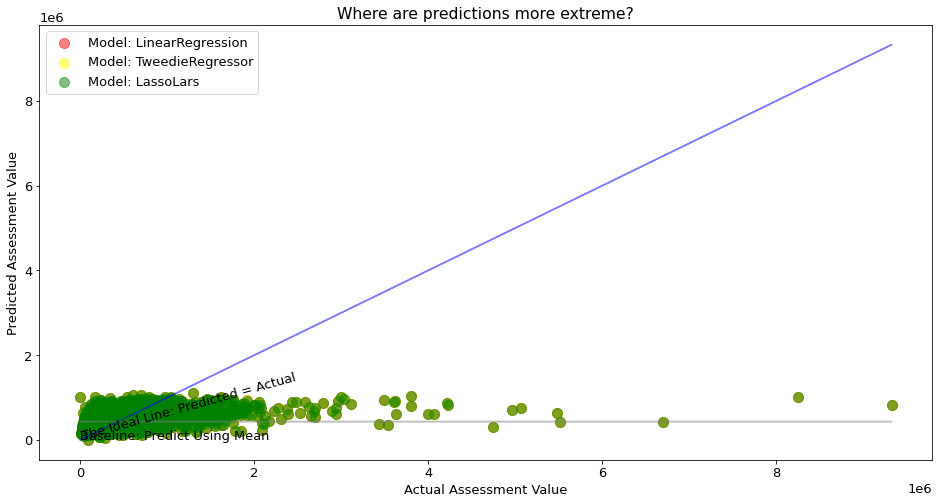

In [98]:
# y_validate.head()
plt.figure(figsize=(16,8))
plt.plot(y_validate.actual, y_validate.baseline, alpha=.5, color="gray", label='_nolegend_')
plt.annotate("Baseline: Predict Using Mean", (16, 9.5))
plt.plot(y_validate.actual, y_validate.actual, alpha=.5, color="blue", label='_nolegend_')
plt.annotate("The Ideal Line: Predicted = Actual", (.5, 3.5), rotation=15.5)

plt.scatter(y_validate.actual, y_validate.appraised_value_pred_lr, 
            alpha=.5, color="red", s=100, label="Model: LinearRegression")
plt.scatter(y_validate.actual, y_validate.appraised_value_pred_glm, 
            alpha=.5, color="yellow", s=100, label="Model: TweedieRegressor")
plt.scatter(y_validate.actual, y_validate.appraised_value_pred_lars, 
            alpha=.5, color="green", s=100, label="Model: LassoLars")

plt.legend()
plt.xlabel("Actual Assessment Value")
plt.ylabel("Predicted Assessment Value")
plt.title("Where are predictions more extreme?")
plt.show()

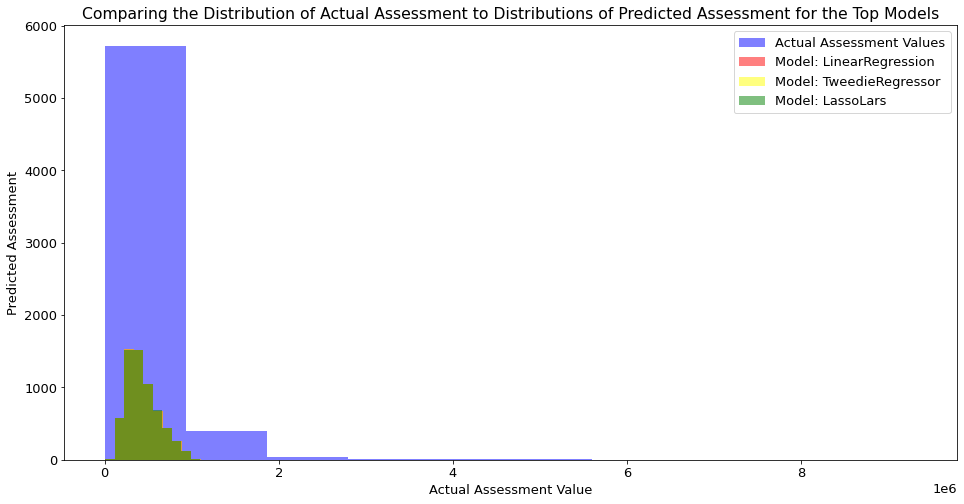

In [99]:
# plot to visualize actual vs predicted. 
plt.figure(figsize=(16,8))
plt.hist(y_validate.actual, color='blue', alpha=.5, label="Actual Assessment Values")
plt.hist(y_validate.appraised_value_pred_lr, color='red', alpha=.5, label="Model: LinearRegression")
plt.hist(y_validate.appraised_value_pred_glm, color='yellow', alpha=.5, label="Model: TweedieRegressor")
plt.hist(y_validate.appraised_value_pred_lars, color='green', alpha=.5, label="Model: LassoLars")
plt.xlabel("Actual Assessment Value")
plt.ylabel("Predicted Assessment")
plt.title("Comparing the Distribution of Actual Assessment to Distributions of Predicted Assessment for the Top Models")
plt.legend()
plt.show()

# Additional Deliverables

In [100]:
# create Tax_rate column
zillow_df['tax_rate'] =zillow_df['taxamount']/ zillow_df['taxvaluedollarcnt']

In [101]:
zillow_df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,parcelid,tax_rate
0,3.0,2.0,1316.0,205123.0,1923.0,2627.48,6037.0,11721753,0.012809
1,3.0,2.0,1458.0,136104.0,1970.0,2319.90,6037.0,11289917,0.017045
2,2.0,1.0,1421.0,35606.0,1911.0,543.69,6037.0,11705026,0.015270
3,4.0,3.0,2541.0,880456.0,2003.0,9819.72,6059.0,14269464,0.011153
4,3.0,2.0,1491.0,107110.0,1955.0,1399.27,6037.0,11446756,0.013064


In [102]:
#Do fips (state and counties)- Do dictionary?

In [103]:
#Looking at unique values for the fips columns
zillow_df['fips'].value_counts()

6037.0    16484
6059.0     6926
6111.0     2403
Name: fips, dtype: int64

In [104]:
# Adding state column
zillow_df['state_name'] = 'California'

In [105]:
# add the name of the county based on the FIPS numbers
zillow_df['county_name'] = zillow_df['fips'].map({6037: 'Los Angeles', 6059: 'Orange', 6111: 'Ventura'})

# show counts by county
zillow_df.county_name.value_counts()

Los Angeles    16484
Orange          6926
Ventura         2403
Name: county_name, dtype: int64

In [106]:
zillow_df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,parcelid,tax_rate,state_name,county_name
0,3.0,2.0,1316.0,205123.0,1923.0,2627.48,6037.0,11721753,0.012809,California,Los Angeles
1,3.0,2.0,1458.0,136104.0,1970.0,2319.90,6037.0,11289917,0.017045,California,Los Angeles
2,2.0,1.0,1421.0,35606.0,1911.0,543.69,6037.0,11705026,0.015270,California,Los Angeles
3,4.0,3.0,2541.0,880456.0,2003.0,9819.72,6059.0,14269464,0.011153,California,Orange
4,3.0,2.0,1491.0,107110.0,1955.0,1399.27,6037.0,11446756,0.013064,California,Los Angeles


(0.0, 0.05)

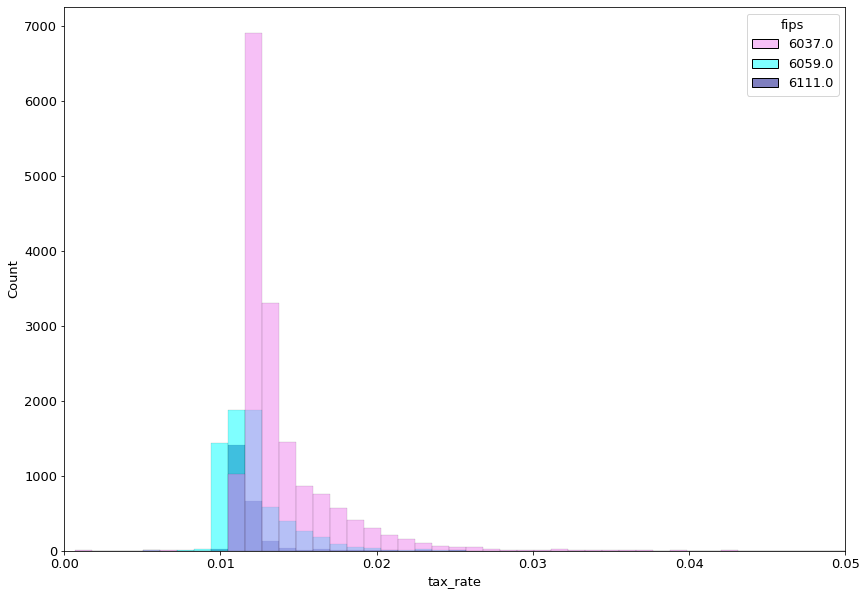

In [107]:
plt.figure(figsize=(14,10))
sns.histplot(data=zillow_df, x="tax_rate", hue="fips",kde = False, bins = 750,  palette={6037:'violet', 6059:'aqua', 6111:'navy'})

plt.xlim(0, 0.05)